# Sentiment Clustering

## Setup

### Imports

In [1]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]

### Data

In [8]:
pathToFile = "C:\\Users\\lukas\\Documents\\Waultar\\performance\\"
fileName = "dataPoints.json"
# dataPointsJson = json.load(open("C:\\Users\\lukas\\Documents\\Waultar\\performance\\dataPoints.json", encoding="utf8"))
dataPointsJson = json.load(open(pathToFile + fileName, encoding="utf8"))
categoriesJson = json.load(open(pathToFile + "dataCategories.json", encoding="utf8"))

x_list = []
y_list = []
category_to_point = []
category_list = []
count = 0
sentimentTextCount = 0
sentimentTextList = []

# m1 = MinHash(num_perm=128)

for category in categoriesJson:
    category_list.append({'id': category["id"], 'category': category["category"]})

for point in dataPointsJson:
    count = count + 1
    if point["sentimentScore"] != None:
        sentimentTextCount = sentimentTextCount + 1
        sentimentTextList.append(point["sentimentText"])
        x_list.append(count)
        y_list.append(point["sentimentScore"])
        category_to_point.append( \
            list(filter(lambda category: category["id"] == point["category"], category_list)) \
            [0]["category"])

def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

print(unique(category_to_point))
print(len(x_list))

['Comments' 'Messaging' 'Posts']
None
1259


## Cleaning of data, emojis and hashtags

In [ ]:
#!/usr/bin/env python
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

for text in sentimentTextList:
    print(deEmojify(text))

## Overview of sentiment data

In [3]:
print(f"##### Start of DataPoint Analysis ####")
print(f"Total amount of data points: {count}")
print(f"{sentimentTextCount} sentiment text found")
print(f"##### End of DataPoint Analysis ####")

##### Start of DataPoint Analysis ####
Total amount of data points: 3354
677 sentiment text found
##### End of DataPoint Analysis ####


## Clustering of data

[[2.37000000e+02 4.36589345e-01]
 [6.93371560e+02 4.83469330e-01]
 [4.66500000e+02 4.53792524e-01]]


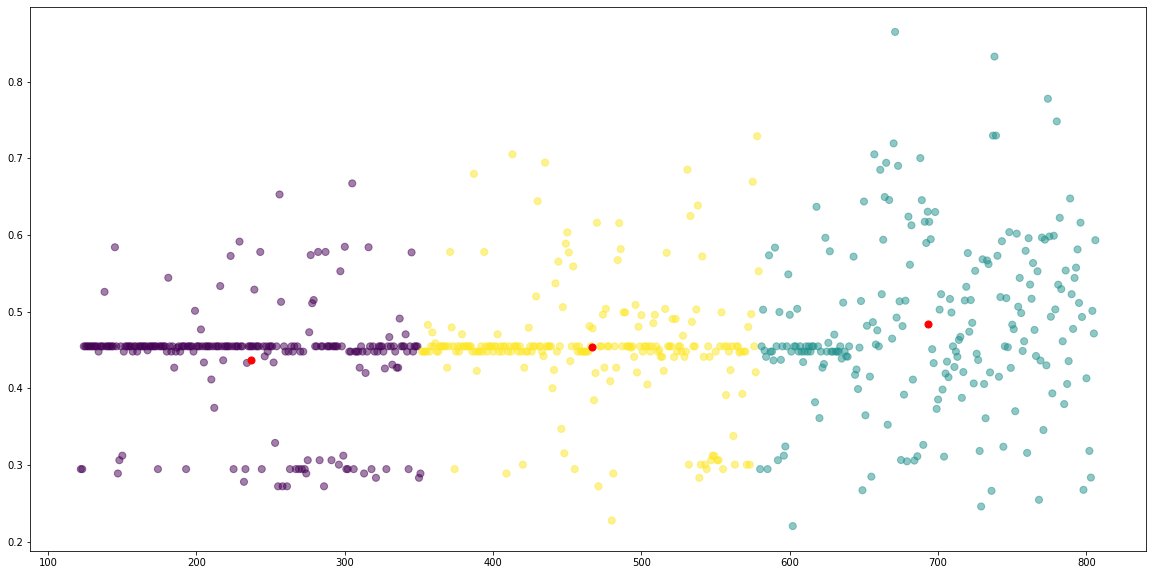

In [4]:
rawData = {'x': x_list, 'y': y_list}
df = DataFrame(rawData, columns=['x','y'])

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

## Histogram of data

array([[<AxesSubplot:title={'center':'Comments'}>,
        <AxesSubplot:title={'center':'Messaging'}>],
       [<AxesSubplot:title={'center':'Posts'}>, <AxesSubplot:>]],
      dtype=object)

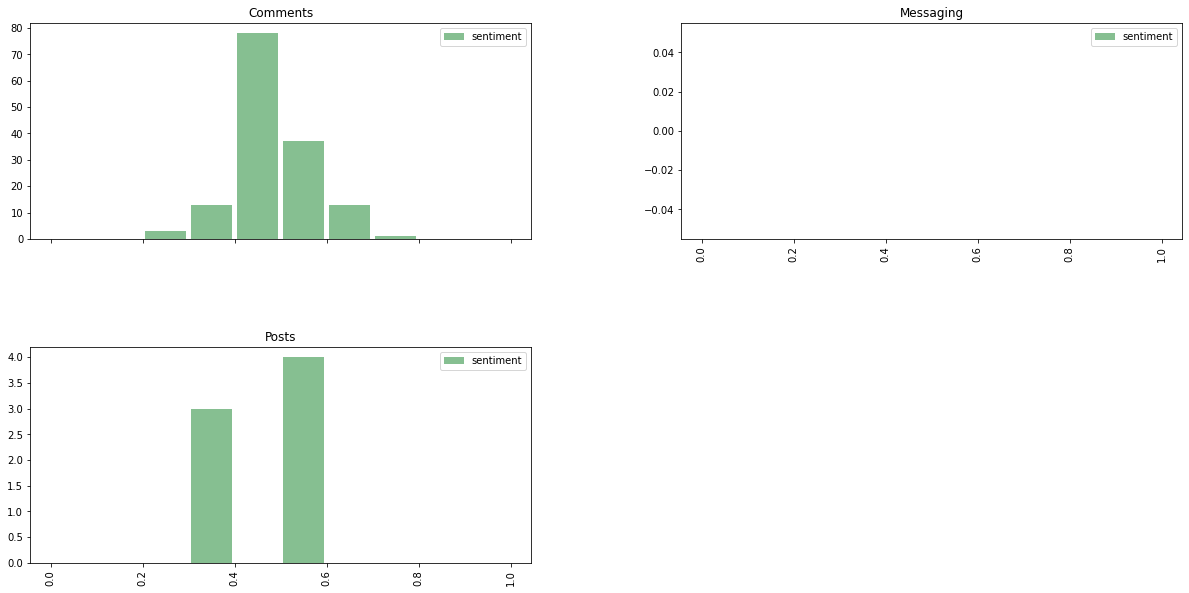

In [9]:
df = DataFrame({'sentiment': y_list, 'category': category_to_point}, \
    columns=['sentiment', 'category'])

df.hist(bins=[0, .1, .2, .3, .4, .5, .6, .7 ,.8, .9, 1], by='category', \
    legend=True, grid=False, sharex=True, color='#86bf91', rwidth=0.9)